In [10]:
from numpy.lib.histograms import histogram
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib._color_data as mcd
import os
import numpy as np
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import re
from sklearn import preprocessing
import plotly.express as px
from pandas.plotting import parallel_coordinates
import plotly.graph_objects as go

label_encoder = preprocessing.LabelEncoder()

In [6]:
iris_path = os.path.join(os.getcwd(), 'dataset', 'iris', 'iris.data')
iris_features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
features_titlize = [x.replace("_", " ").title() for x in iris_features]
df = pd.read_csv(
    iris_path,
    sep=',',
    names=["sepal_length", "sepal_width", "petal_length", "petal_width", "class"])

iris_data = df[iris_features]
iris_classes = np.array(df['class'])
class_name = sorted(list(set(iris_classes)), reverse=False)
colors = ['#EA4335', '#FBBC04', '#4285F4', '#34A853', '#97710C', '#FD8EBB', '#A610D8']
plt.rcParams['axes.facecolor'] = '#f5f5f5'
sns.set()


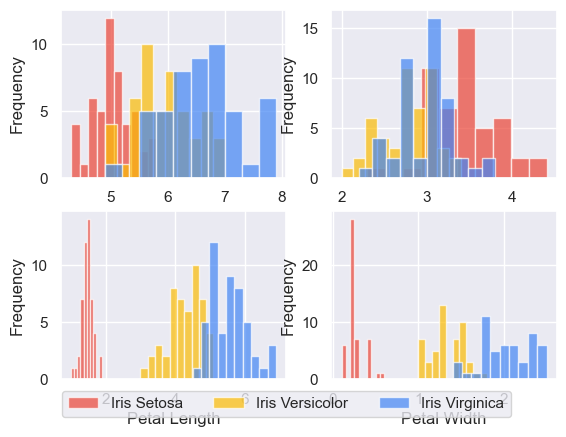

In [7]:
iris_data = np.array(iris_data)
for feature in range(iris_data.shape[1]):
    plt.subplot(2, 2, feature + 1)
    for label, color in zip(range(len(class_name)), colors):
        plt.hist(iris_data[iris_classes == class_name[label], feature],
                    label=class_name[label].replace("-", " ").title(),
                    color=color,
                    histtype='bar',
                    ec='white',
                    alpha=0.7)

    plt.ylabel("Frequency")
    plt.xlabel(iris_features[feature].replace("_", " ").title())

plt.legend(bbox_to_anchor=(-0.2, -0.27), loc='lower center', ncol=len(class_name))
# plt.subplots_adjust(bottom=0.25)
plt.show()

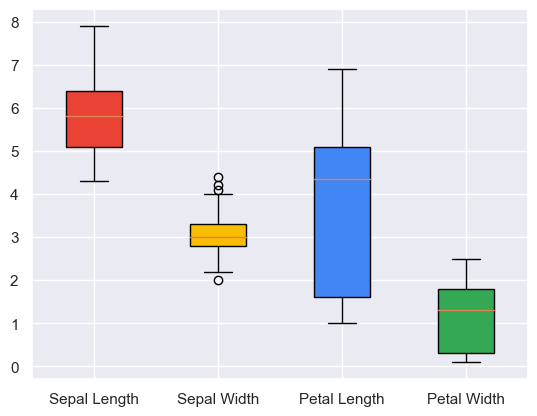

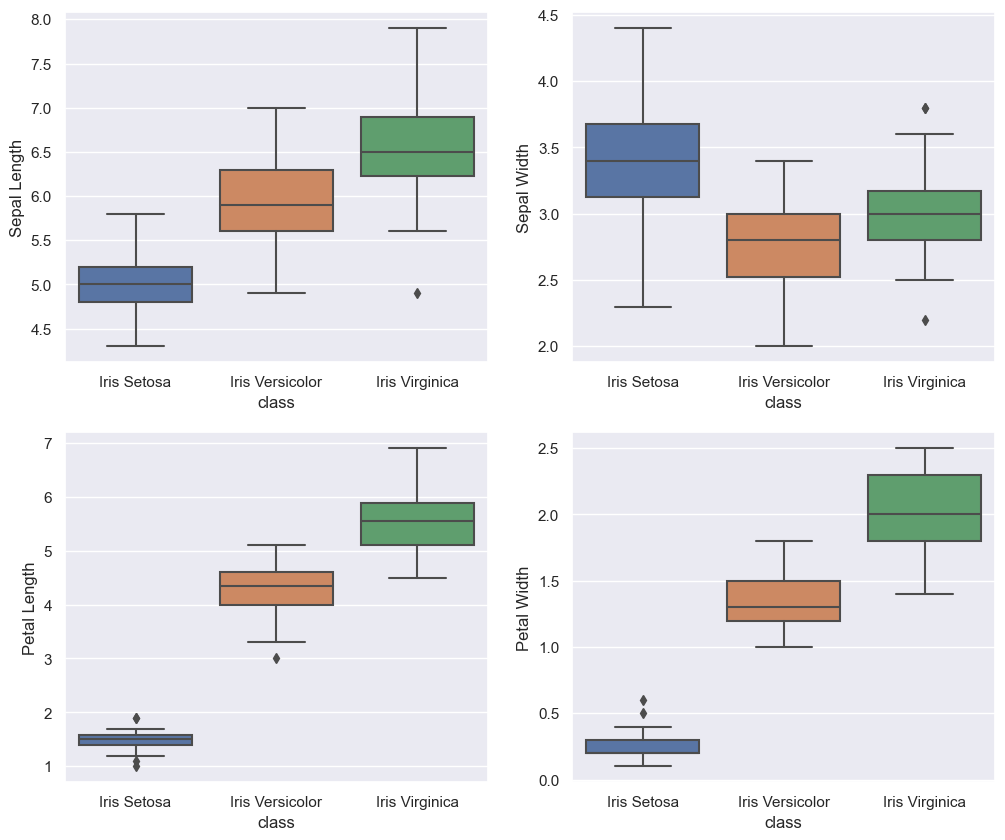

In [8]:
box = plt.boxplot(df[iris_features], patch_artist=True, labels=features_titlize)
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.show()

plt.figure(figsize=(12,10))
class_name = [x.replace("-", " ").title() for x in class_name]
for i in range(len(iris_features)):
    plt.subplot(2,2, i + 1)
    boxes = sns.boxplot(x='class', y=iris_features[i], data=df)
    for j in range(len(boxes.artists)):
        mybox = boxes.artists[j]
        mybox.set_facecolor(colors[j])
    boxes.set_xticklabels(class_name)
    plt.ylabel(features_titlize[i])
plt.show()

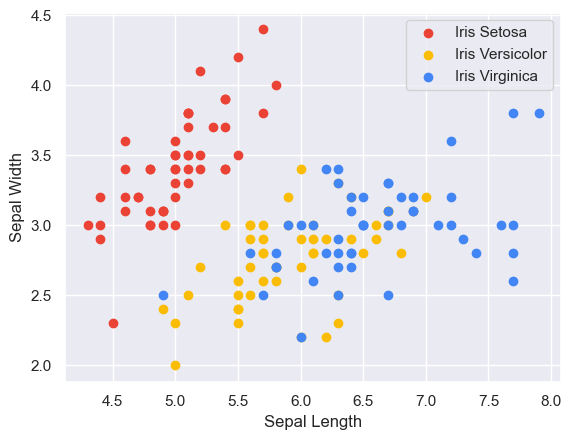

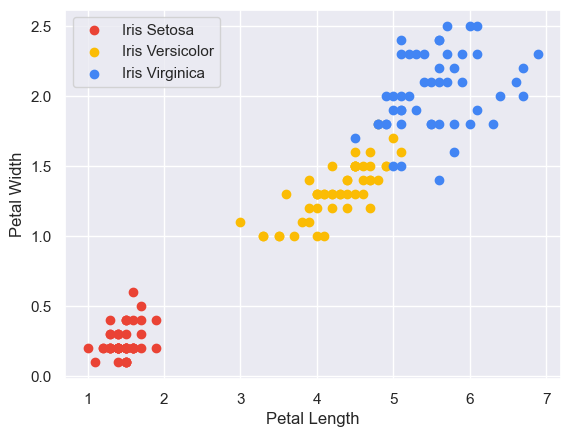

In [11]:
# Plot sepal_length - sepal_width
# Plot petal_length - petal_width
labels = label_encoder.fit_transform(iris_classes)
colors_for_label = df['class'].map({'Iris-setosa': colors[0], 'Iris-versicolor': colors[1], 'Iris-virginica': colors[2]})
i = 0
# formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
while i <= 2:
    for index, (n, grp) in enumerate(df.groupby("class")):
        plt.scatter(grp[iris_features[i]], grp[iris_features[i + 1]], label=n.replace('-', ' ').title(), c=colors[index])
    plt.xlabel(iris_features[i].replace('_', ' ').title())
    plt.ylabel(iris_features[i + 1].replace('_', ' ').title())
    plt.legend()
    plt.show()

    # plt.scatter(iris_data[iris_features[i]], iris_data[iris_features[i + 1]], c=colors_for_label)
    # plt.xlabel(iris_features[i].replace('_', ' ').title())
    # plt.ylabel(iris_features[i + 1].replace('_', ' ').title())
    # plt.legend(class_name)
    # plt.tight_layout()
    # plt.show()
    i += 2

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


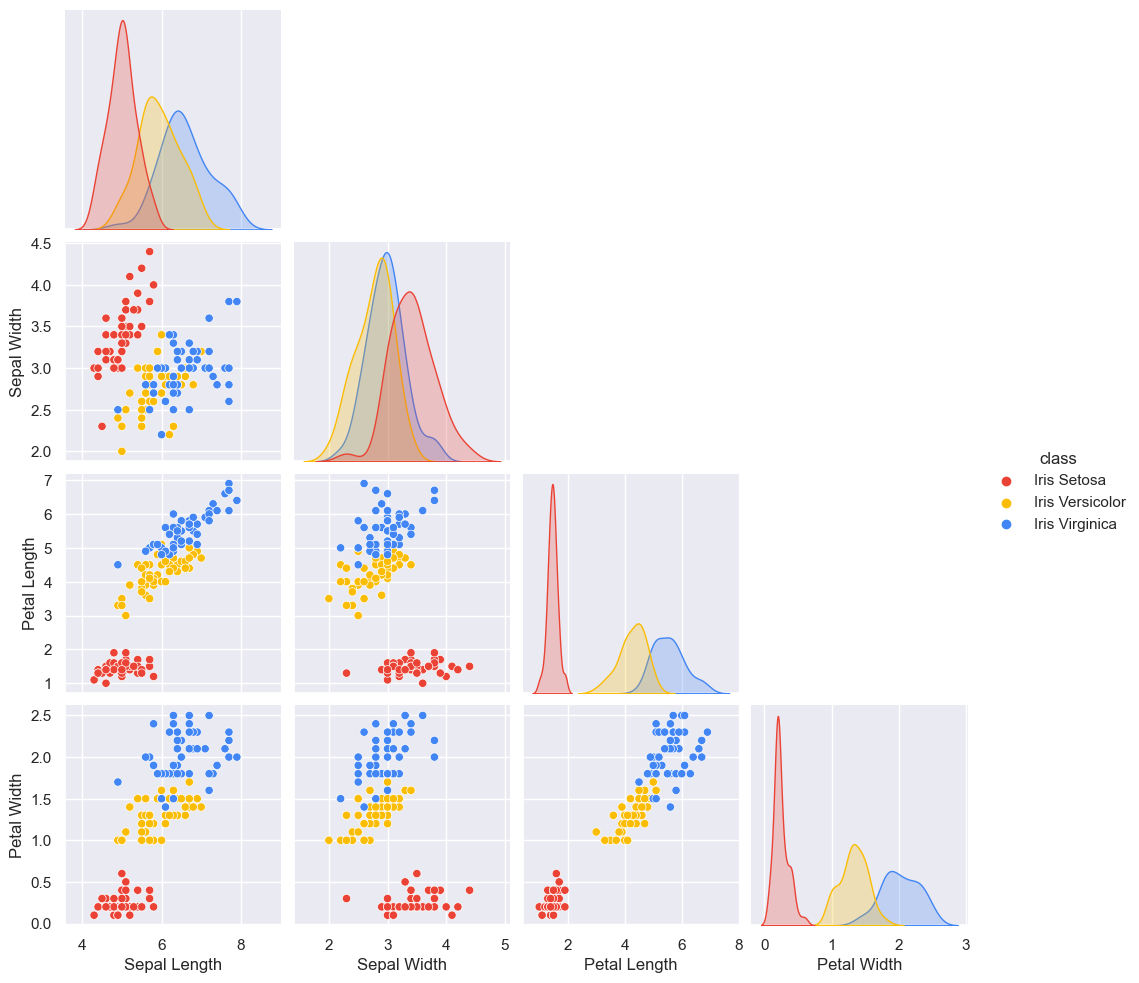

In [12]:
sns.set_palette(sns.color_palette(colors))
df1 = pd.read_csv(iris_path, sep=',', names=features_titlize + ['class'])
df1['class'] = df1['class'].str.replace('-',' ')
df1['class'] = df1['class'].str.title()
sns.pairplot(df1, hue="class", corner=True)
plt.show()